<a href="https://colab.research.google.com/github/TonyVM/codigo-tesis-parkinson/blob/master/COmparacion_DFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://archive.ics.uci.edu/dataset/174/parkinsons

#Instalando Libraries

In [1]:
!pip install optuna
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00


#Importando librerias

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
import optuna

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb

#Examine the Dataset

In [11]:
data_dir = 'Parkinsson_disease.csv'
df = pd.read_csv(data_dir)

data_dir_2 = 'train_scaled.csv' #'train-v1.2.csv'
df2 = pd.read_csv(data_dir_2)

df3 = pd.read_csv('train-v1.2.csv')

In [ ]:
df.head()

In [12]:
df2.shape

(40, 29)

In [13]:
df3.shape

(1040, 29)

Get list of features in both datasets

In [7]:
features1 = list(df.columns)
features2 = list(df2.columns)

In [8]:
print(features1)
print(features2)

['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
['id', 'Jitter (local)', 'Jitter (local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)', 'Jitter (ddp)', 'Shimmer (local)', 'Shimmer (local, dB)', 'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NTH', 'HTN', 'Median pitch', 'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch', 'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period', 'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks', 'UPDRS', 'class information']


Estadistica descriptiva

In [9]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


#Eliminando caracteristicas que no aportan nada y seleccionando la variable objetivo

In [26]:
cols_to_drop_df = ["name", "status"]
target_df = "status"

cols_to_drop_df2 = ["id", "class information", "UPDRS"]
target_df2 = "class information"

cols_to_drop_df3 = ["id", "class information", "UPDRS"]
target_df3 = "class information"

In [27]:
# Drop the name column and extract the "status" column as target

X1 = df.drop(cols_to_drop_df, axis=1)
y1 = df[target_df]

X2 = df2.drop(cols_to_drop_df2, axis=1)
y2 = df2[target_df2]

X3 = df3.drop(cols_to_drop_df3, axis=1)
y3 = df3[target_df3]

In [ ]:
X1.isnull().sum()

In [ ]:
X2.isnull().sum()

In [28]:
X3

,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),...,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,10.421,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,14.773,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,12.981,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,10.853,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,11.499,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,8.303,...,14.387,96.145,158.591,63,60,0.007766,0.001066,24.194,2,15.113
1036,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,11.928,...,7.140,121.490,143.797,47,44,0.007561,0.000430,46.053,1,25.792
1037,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,14.239,...,13.593,95.921,149.641,79,77,0.007767,0.000881,20.000,1,4.574
1038,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,18.818,...,46.764,90.051,451.366,75,70,0.007257,0.001714,16.667,3,19.575


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# def train_and_evaluate_models_with_confusion_matrix(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Models with parameters
    models = {
        'Logistic Regression': LogisticRegression(
            max_iter=1000,
            random_state=42,
            class_weight='balanced',
            solver='lbfgs'
        ),
        'Decision Tree': DecisionTreeClassifier(
            random_state=42,
            max_depth=10,
            min_samples_split=5,
            class_weight='balanced',
        ),
        'Random Forest': RandomForestClassifier(
            n_estimators=200,
            criterion='log_loss',
            max_depth=15,
            min_samples_split=5,
            class_weight='balanced',
            random_state=42
        ),
        'Support Vector Classifier': SVC(
            kernel='poly',
            gamma='scale',
            C=1.0,
            random_state=42
        ),
        'XGBoost': XGBClassifier(
            use_label_encoder=False,
            max_depth=10,
            learning_rate=0.1,
            n_estimators=200,
            eval_metric='logloss',
            scale_pos_weight=3,
            random_state=42
        ),
        'CatBoost': CatBoostClassifier(
            iterations=200,
            learning_rate=0.1,
            depth=10,
            verbose=0,
            random_state=42
        )
    }

    # Training and evaluating each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        f1_class0 = f1_score(y_test, y_pred, pos_label=0)
        f1_class1 = f1_score(y_test, y_pred, pos_label=1)

        print(f'\n{name} - F1 score: {f1:.4f}')
        print(f'\n{name} - Accuracy: {accuracy:.4f}, F1 Score-macro: {f1_macro:.4f}')
        print(f'\n{name} - F1 Score-class0: {f1_class0:.4f}, F1 Score-class1: {f1_class1:.4f}')
        # Print confusion matrix for XGBoost
        cv_scores = cross_val_score(
            model, X_train, y_train,
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring='f1_macro'
        )
        print(f'CV F1-macro: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})')
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

#esto es con los modelos principales, ya se estandariza para los modelos que lo necesitan

In [44]:
def train_and_evaluate_models_improved(X, y):

  # Split de datos
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

  # Escalado para modelos que lo requieren
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Calcular scale_pos_weight para XGBoost
  n_pos = np.sum(y_train == 1)
  n_neg = np.sum(y_train == 0)
  scale_pos_weight = n_neg / n_pos

  # Modelos con parámetros mejorados
  models = {
      'Logistic Regression': {
          'model': LogisticRegression(
              max_iter=1000,
              random_state=42,
              solver='lbfgs',
              class_weight='balanced'  # Manejo del desbalance
          ),
          'use_scaled': True  # Necesita escalado
      },
      'Decision Tree': {
          'model': DecisionTreeClassifier(
              random_state=42,
              max_depth=10,
              min_samples_split=5,
              class_weight='balanced'  # Manejo del desbalance
          ),
          'use_scaled': False
      },
      'Random Forest': {
          'model': RandomForestClassifier(
              n_estimators=200,
              criterion='log_loss',
              max_depth=15,
              min_samples_split=5,
              class_weight='balanced',  # Manejo del desbalance
              random_state=42
          ),
          'use_scaled': False
      },
      'Support Vector Classifier': {
          'model': SVC(
              kernel='poly',
              gamma='scale',
              C=1.0,
              class_weight='balanced',  # Manejo del desbalance
              random_state=42
          ),
          'use_scaled': True  # Necesita escalado
      },
      'XGBoost': {
          'model': XGBClassifier(
              max_depth=10,
              learning_rate=0.1,
              n_estimators=200,
              eval_metric='logloss',
              scale_pos_weight=scale_pos_weight,  # Manejo del desbalance
              random_state=42
          ),
          'use_scaled': False
      },
      'CatBoost': {
          'model': CatBoostClassifier(
              iterations=200,
              learning_rate=0.1,
              depth=10,
              class_weights=[1, scale_pos_weight],  # Manejo del desbalance
              verbose=0,
              random_state=42
          ),
          'use_scaled': False
      }
  }

  # Validación cruzada estratificada
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  print("="*80)
  print("EVALUACIÓN DE MODELOS CON VALIDACIÓN CRUZADA Y MANEJO DE DESBALANCE")
  print("="*80)

  # Entrenar y evaluar cada modelo
  for name, model_info in models.items():
      model = model_info['model']
      use_scaled = model_info['use_scaled']

      # Seleccionar datos escalados o no según el modelo
      X_train_use = X_train_scaled if use_scaled else X_train
      X_test_use = X_test_scaled if use_scaled else X_test

      # Entrenar modelo
      model.fit(X_train_use, y_train)

      # Predicciones
      y_pred = model.predict(X_test_use)

      # Métricas en conjunto de prueba
      accuracy = accuracy_score(y_test, y_pred)
      f1_macro = f1_score(y_test, y_pred, average='macro')
      f1_weighted = f1_score(y_test, y_pred, average='weighted')
      f1_class0 = f1_score(y_test, y_pred, pos_label=0)  # F1 para sanos
      f1_class1 = f1_score(y_test, y_pred, pos_label=1)  # F1 para Parkinson

      # Validación cruzada
      cv_f1_macro = cross_val_score(model, X_train_use, y_train, cv=cv, scoring='f1_macro')
      cv_accuracy = cross_val_score(model, X_train_use, y_train, cv=cv, scoring='accuracy')

      print(f'\n{name}:')
      print(f'  Test Set Results:')
      print(f'    Accuracy: {accuracy:.4f}')
      print(f'    F1-Macro: {f1_macro:.4f}')
      print(f'    F1-Weighted: {f1_weighted:.4f}')
      print(f'    F1-Sanos (Clase 0): {f1_class0:.4f}')
      print(f'    F1-Parkinson (Clase 1): {f1_class1:.4f}')
      print(f'  Cross Validation (5-fold):')
      print(f'    CV F1-Macro: {cv_f1_macro.mean():.4f} (+/- {cv_f1_macro.std() * 2:.4f})')
      print(f'    CV Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std() * 2:.4f})')

      # Matriz de confusión
      cm = confusion_matrix(y_test, y_pred)
      plt.figure(figsize=(8, 6))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                  xticklabels=['Sanos', 'Parkinson'],
                  yticklabels=['Sanos', 'Parkinson'])
      plt.title(f'Confusion Matrix for {name}')
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.show()

      # Reporte de clasificación detallado
      print(f'  Classification Report:')
      print(classification_report(y_test, y_pred, target_names=['Sanos', 'Parkinson']))
      print("-" * 60)

#lo que sigue es usando mayor cantidad de modelos

In [41]:
# train_and_evaluate_models_with_confusion_matrix(X, y)
def train_and_eval_model(X, y):
    # Split de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Escalado para modelos que lo requieren
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Calcular scale_pos_weight para XGBoost
    n_pos = np.sum(y_train == 1)
    n_neg = np.sum(y_train == 0)
    scale_pos_weight = n_neg / n_pos

    # Modelos con parámetros mejorados
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(
                max_iter=1000,
                random_state=42,
                solver='lbfgs',
                class_weight='balanced'  # Manejo del desbalance
            ),
            'use_scaled': True  # Necesita escalado
        },
        'Logistic Regression Ridge': {
            'model': LogisticRegression(
                max_iter=1000,
                random_state=42,
                solver='lbfgs',
                penalty='l2',
                C=1.0,  # Regularización
                class_weight='balanced'
            ),
            'use_scaled': True
        },
        'Logistic Regression Lasso': {
            'model': LogisticRegression(
                max_iter=1000,
                random_state=42,
                solver='liblinear',
                penalty='l1',
                C=1.0,  # Regularización
                class_weight='balanced'
            ),
            'use_scaled': True
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(
                random_state=42,
                max_depth=10,
                min_samples_split=5,
                class_weight='balanced'  # Manejo del desbalance
            ),
            'use_scaled': False
        },
        'Random Forest': {
            'model': RandomForestClassifier(
                n_estimators=200,
                criterion='log_loss',
                max_depth=15,
                min_samples_split=5,
                class_weight='balanced',  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': False
        },
        'SVM Polynomial': {
            'model': SVC(
                kernel='poly',
                gamma='scale',
                C=1.0,
                class_weight='balanced',  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': True  # Necesita escalado
        },
        'SVM RBF': {
            'model': SVC(
                kernel='rbf',
                gamma='scale',
                C=1.0,
                class_weight='balanced',  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': True  # Necesita escalado
        },
        'SVM Linear': {
            'model': SVC(
                kernel='linear',
                C=1.0,
                class_weight='balanced',  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': True  # Necesita escalado
        },
        'KNN': {
            'model': KNeighborsClassifier(
                n_neighbors=5,
                weights='distance',  # Pesos por distancia
                metric='euclidean'
            ),
            'use_scaled': True  # KNN necesita escalado
        },
        'KNN Uniform': {
            'model': KNeighborsClassifier(
                n_neighbors=7,
                weights='uniform',  # Pesos uniformes
                metric='euclidean'
            ),
            'use_scaled': True  # KNN necesita escalado
        },
        'Neural Network': {
            'model': MLPClassifier(
                hidden_layer_sizes=(100, 50),  # 2 capas ocultas
                max_iter=1000,
                random_state=42,
                solver='adam',
                alpha=0.01,  # Regularización L2
                learning_rate='adaptive'
            ),
            'use_scaled': True  # Redes neuronales necesitan escalado
        },
        'Neural Network Small': {
            'model': MLPClassifier(
                hidden_layer_sizes=(50,),  # 1 capa oculta pequeña
                max_iter=1000,
                random_state=42,
                solver='lbfgs',  # Mejor para datasets pequeños
                alpha=0.1,  # Más regularización para evitar overfitting
            ),
            'use_scaled': True
        },
        'XGBoost': {
            'model': XGBClassifier(
                max_depth=10,
                learning_rate=0.1,
                n_estimators=200,
                eval_metric='logloss',
                scale_pos_weight=scale_pos_weight,  # Manejo del desbalance
                random_state=42
            ),
            'use_scaled': False
        },
        'CatBoost': {
            'model': CatBoostClassifier(
                iterations=200,
                learning_rate=0.1,
                depth=10,
                class_weights=[1, scale_pos_weight],  # Manejo del desbalance
                verbose=0,
                random_state=42
            ),
            'use_scaled': False
        }
    }

    # Validación cruzada estratificada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    print("="*80)
    print("EVALUACIÓN DE MODELOS CON VALIDACIÓN CRUZADA Y MANEJO DE DESBALANCE")
    print("="*80)

    # Entrenar y evaluar cada modelo
    for name, model_info in models.items():
        model = model_info['model']
        use_scaled = model_info['use_scaled']

        # Seleccionar datos escalados o no según el modelo
        X_train_use = X_train_scaled if use_scaled else X_train
        X_test_use = X_test_scaled if use_scaled else X_test

        # Entrenar modelo
        model.fit(X_train_use, y_train)

        # Predicciones
        y_pred = model.predict(X_test_use)

        # Métricas en conjunto de prueba
        accuracy = accuracy_score(y_test, y_pred)
        f1_macro = f1_score(y_test, y_pred, average='macro')
        f1_weighted = f1_score(y_test, y_pred, average='weighted')
        f1_class0 = f1_score(y_test, y_pred, pos_label=0)  # F1 para sanos
        f1_class1 = f1_score(y_test, y_pred, pos_label=1)  # F1 para Parkinson

        # Validación cruzada
        cv_f1_macro = cross_val_score(model, X_train_use, y_train, cv=cv, scoring='f1_macro')
        cv_accuracy = cross_val_score(model, X_train_use, y_train, cv=cv, scoring='accuracy')

        print(f'\n{name}:')
        print(f'  Test Set Results:')
        print(f'    Accuracy: {accuracy:.4f}')
        print(f'    F1-Macro: {f1_macro:.4f}')
        print(f'    F1-Weighted: {f1_weighted:.4f}')
        print(f'    F1-Sanos (Clase 0): {f1_class0:.4f}')
        print(f'    F1-Parkinson (Clase 1): {f1_class1:.4f}')
        print(f'  Cross Validation (5-fold):')
        print(f'    CV F1-Macro: {cv_f1_macro.mean():.4f} (+/- {cv_f1_macro.std() * 2:.4f})')
        print(f'    CV Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std() * 2:.4f})')

        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Sanos', 'Parkinson'],
                   yticklabels=['Sanos', 'Parkinson'])
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Reporte de clasificación detallado
        print(f'  Classification Report:')
        print(classification_report(y_test, y_pred, target_names=['Sanos', 'Parkinson']))
        print("-" * 60)

#Evaluando los modelos

EVALUACIÓN DE MODELOS CON VALIDACIÓN CRUZADA Y MANEJO DE DESBALANCE

Logistic Regression:
  Test Set Results:
    Accuracy: 0.7692
    F1-Macro: 0.7451
    F1-Weighted: 0.7833
    F1-Sanos (Clase 0): 0.6667
    F1-Parkinson (Clase 1): 0.8235
  Cross Validation (5-fold):
    CV F1-Macro: 0.7763 (+/- 0.0822)
    CV Accuracy: 0.8141 (+/- 0.0629)


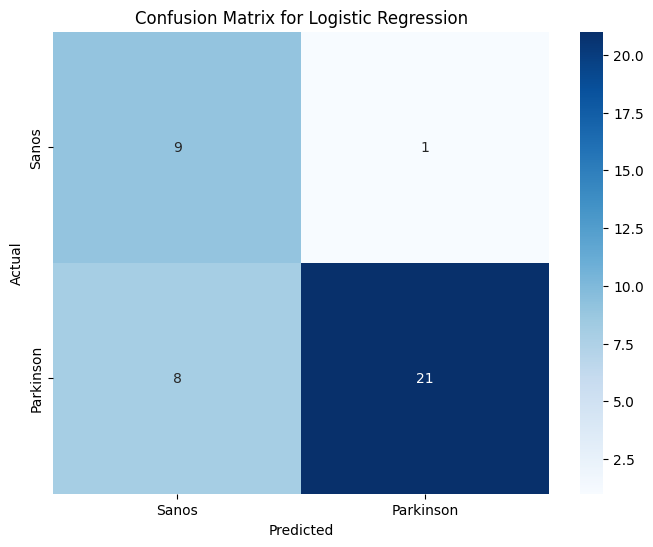

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.53      0.90      0.67        10
   Parkinson       0.95      0.72      0.82        29

    accuracy                           0.77        39
   macro avg       0.74      0.81      0.75        39
weighted avg       0.85      0.77      0.78        39

------------------------------------------------------------

Logistic Regression Ridge:
  Test Set Results:
    Accuracy: 0.7692
    F1-Macro: 0.7451
    F1-Weighted: 0.7833
    F1-Sanos (Clase 0): 0.6667
    F1-Parkinson (Clase 1): 0.8235
  Cross Validation (5-fold):
    CV F1-Macro: 0.7763 (+/- 0.0822)
    CV Accuracy: 0.8141 (+/- 0.0629)


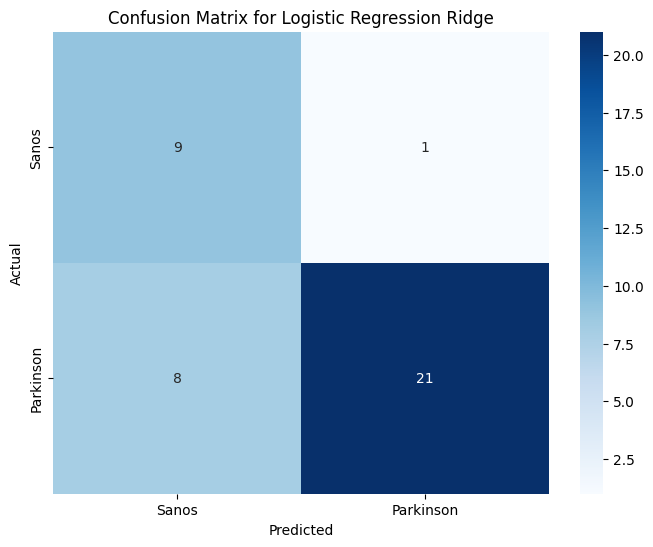

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.53      0.90      0.67        10
   Parkinson       0.95      0.72      0.82        29

    accuracy                           0.77        39
   macro avg       0.74      0.81      0.75        39
weighted avg       0.85      0.77      0.78        39

------------------------------------------------------------

Logistic Regression Lasso:
  Test Set Results:
    Accuracy: 0.7179
    F1-Macro: 0.6885
    F1-Weighted: 0.7352
    F1-Sanos (Clase 0): 0.5926
    F1-Parkinson (Clase 1): 0.7843
  Cross Validation (5-fold):
    CV F1-Macro: 0.7826 (+/- 0.0895)
    CV Accuracy: 0.8206 (+/- 0.0650)


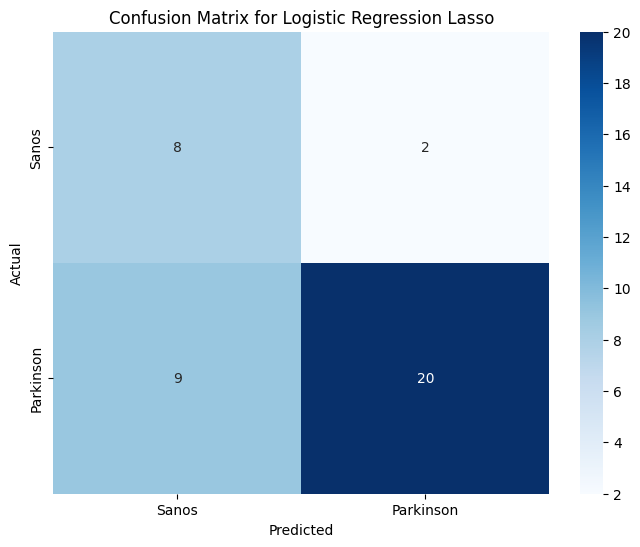

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.47      0.80      0.59        10
   Parkinson       0.91      0.69      0.78        29

    accuracy                           0.72        39
   macro avg       0.69      0.74      0.69        39
weighted avg       0.80      0.72      0.74        39

------------------------------------------------------------

Decision Tree:
  Test Set Results:
    Accuracy: 0.7949
    F1-Macro: 0.7468
    F1-Weighted: 0.8005
    F1-Sanos (Clase 0): 0.6364
    F1-Parkinson (Clase 1): 0.8571
  Cross Validation (5-fold):
    CV F1-Macro: 0.7713 (+/- 0.1950)
    CV Accuracy: 0.8210 (+/- 0.1415)


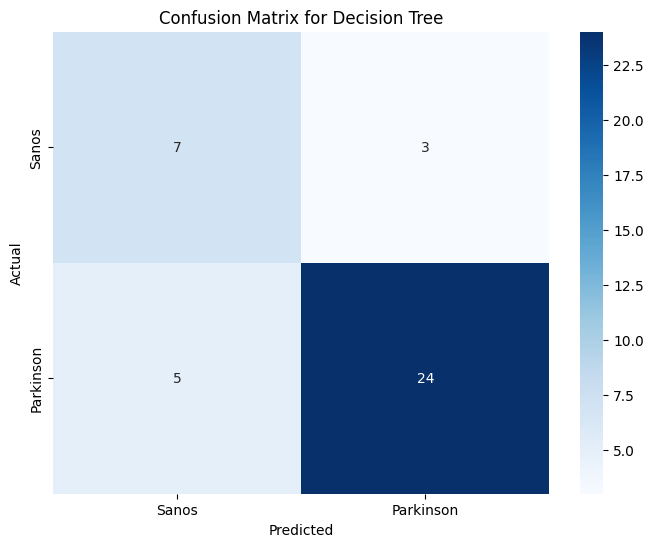

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.58      0.70      0.64        10
   Parkinson       0.89      0.83      0.86        29

    accuracy                           0.79        39
   macro avg       0.74      0.76      0.75        39
weighted avg       0.81      0.79      0.80        39

------------------------------------------------------------

Random Forest:
  Test Set Results:
    Accuracy: 0.9231
    F1-Macro: 0.8956
    F1-Weighted: 0.9217
    F1-Sanos (Clase 0): 0.8421
    F1-Parkinson (Clase 1): 0.9492
  Cross Validation (5-fold):
    CV F1-Macro: 0.8754 (+/- 0.1425)
    CV Accuracy: 0.9101 (+/- 0.1114)


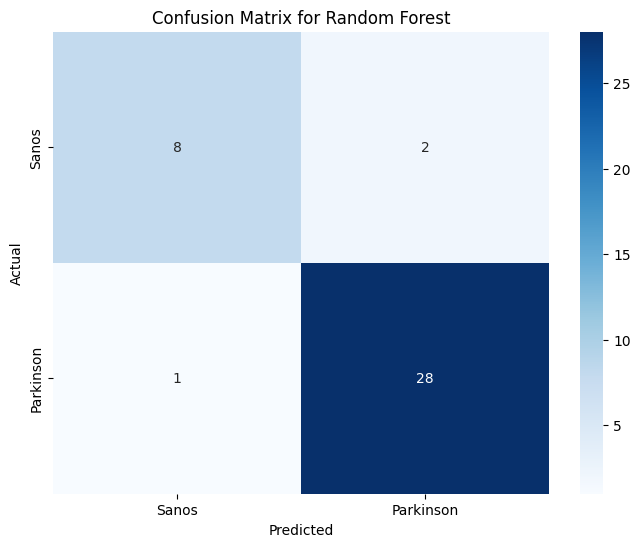

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.89      0.80      0.84        10
   Parkinson       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

------------------------------------------------------------

SVM Polynomial:
  Test Set Results:
    Accuracy: 0.8462
    F1-Macro: 0.7983
    F1-Weighted: 0.8462
    F1-Sanos (Clase 0): 0.7000
    F1-Parkinson (Clase 1): 0.8966
  Cross Validation (5-fold):
    CV F1-Macro: 0.7256 (+/- 0.1678)
    CV Accuracy: 0.8337 (+/- 0.0710)


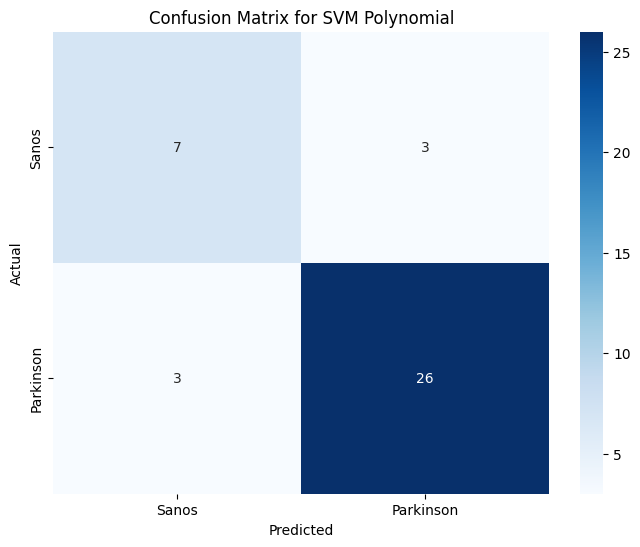

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.70      0.70      0.70        10
   Parkinson       0.90      0.90      0.90        29

    accuracy                           0.85        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.85      0.85      0.85        39

------------------------------------------------------------

SVM RBF:
  Test Set Results:
    Accuracy: 0.7949
    F1-Macro: 0.7771
    F1-Weighted: 0.8078
    F1-Sanos (Clase 0): 0.7143
    F1-Parkinson (Clase 1): 0.8400
  Cross Validation (5-fold):
    CV F1-Macro: 0.7529 (+/- 0.1486)
    CV Accuracy: 0.7883 (+/- 0.1273)


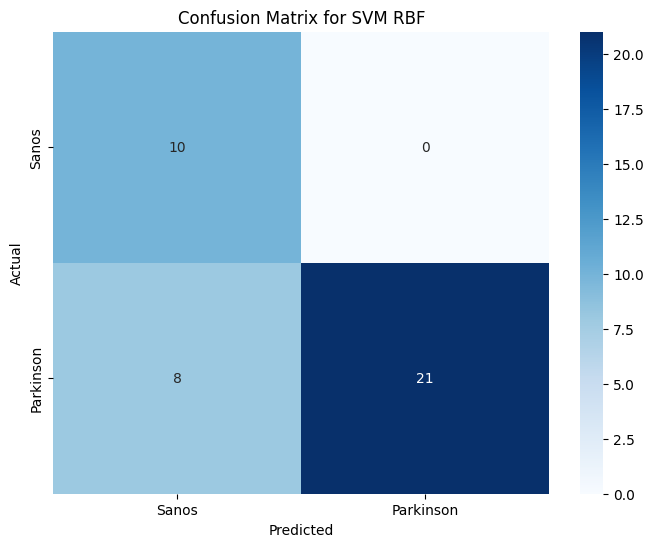

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.56      1.00      0.71        10
   Parkinson       1.00      0.72      0.84        29

    accuracy                           0.79        39
   macro avg       0.78      0.86      0.78        39
weighted avg       0.89      0.79      0.81        39

------------------------------------------------------------

SVM Linear:
  Test Set Results:
    Accuracy: 0.7949
    F1-Macro: 0.7692
    F1-Weighted: 0.8067
    F1-Sanos (Clase 0): 0.6923
    F1-Parkinson (Clase 1): 0.8462
  Cross Validation (5-fold):
    CV F1-Macro: 0.7984 (+/- 0.1254)
    CV Accuracy: 0.8337 (+/- 0.1002)


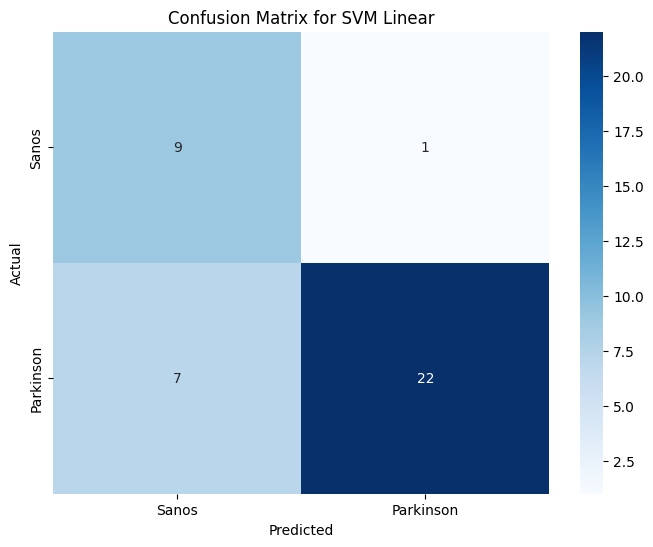

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.56      0.90      0.69        10
   Parkinson       0.96      0.76      0.85        29

    accuracy                           0.79        39
   macro avg       0.76      0.83      0.77        39
weighted avg       0.86      0.79      0.81        39

------------------------------------------------------------

KNN:
  Test Set Results:
    Accuracy: 0.9487
    F1-Macro: 0.9278
    F1-Weighted: 0.9467
    F1-Sanos (Clase 0): 0.8889
    F1-Parkinson (Clase 1): 0.9667
  Cross Validation (5-fold):
    CV F1-Macro: 0.8321 (+/- 0.1284)
    CV Accuracy: 0.8847 (+/- 0.0871)


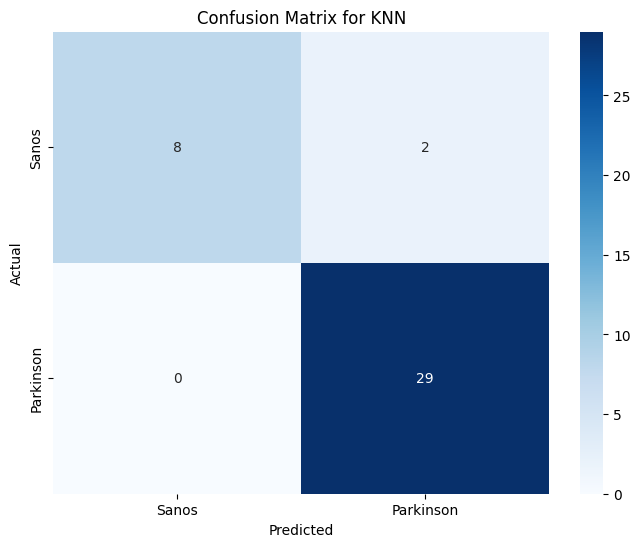

  Classification Report:
              precision    recall  f1-score   support

       Sanos       1.00      0.80      0.89        10
   Parkinson       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39

------------------------------------------------------------

KNN Uniform:
  Test Set Results:
    Accuracy: 0.8718
    F1-Macro: 0.8260
    F1-Weighted: 0.8695
    F1-Sanos (Clase 0): 0.7368
    F1-Parkinson (Clase 1): 0.9153
  Cross Validation (5-fold):
    CV F1-Macro: 0.7637 (+/- 0.2447)
    CV Accuracy: 0.8524 (+/- 0.1131)


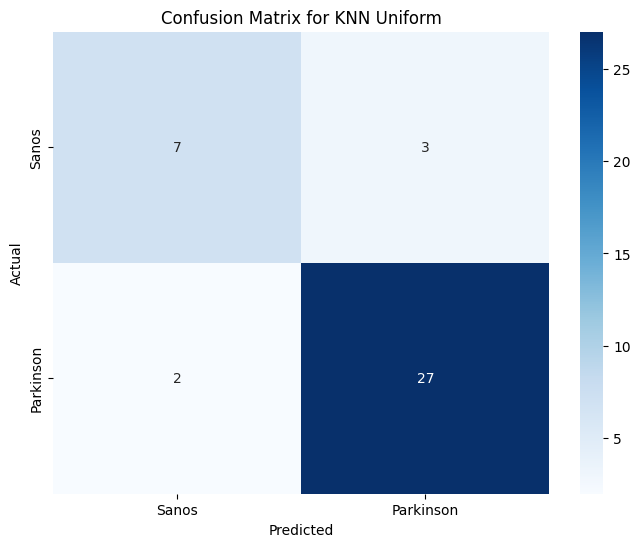

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.78      0.70      0.74        10
   Parkinson       0.90      0.93      0.92        29

    accuracy                           0.87        39
   macro avg       0.84      0.82      0.83        39
weighted avg       0.87      0.87      0.87        39

------------------------------------------------------------

Neural Network:
  Test Set Results:
    Accuracy: 0.9487
    F1-Macro: 0.9328
    F1-Weighted: 0.9487
    F1-Sanos (Clase 0): 0.9000
    F1-Parkinson (Clase 1): 0.9655
  Cross Validation (5-fold):
    CV F1-Macro: 0.8838 (+/- 0.1199)
    CV Accuracy: 0.9167 (+/- 0.0872)


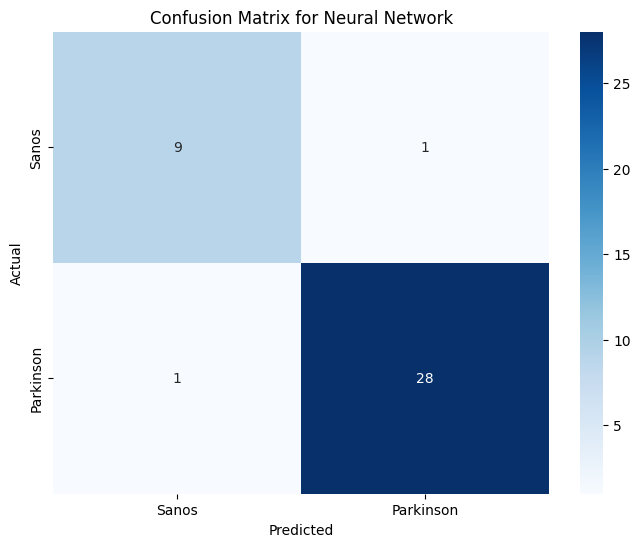

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.90      0.90      0.90        10
   Parkinson       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39

------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS R


Neural Network Small:
  Test Set Results:
    Accuracy: 0.9487
    F1-Macro: 0.9328
    F1-Weighted: 0.9487
    F1-Sanos (Clase 0): 0.9000
    F1-Parkinson (Clase 1): 0.9655
  Cross Validation (5-fold):
    CV F1-Macro: 0.8610 (+/- 0.1019)
    CV Accuracy: 0.8974 (+/- 0.0755)


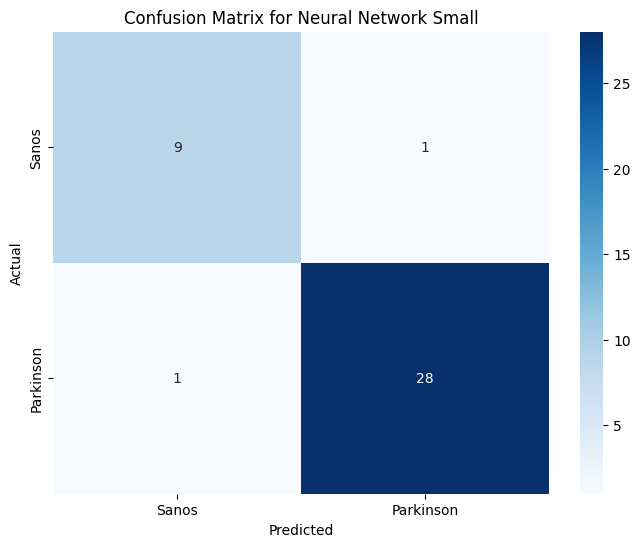

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.90      0.90      0.90        10
   Parkinson       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39

------------------------------------------------------------

XGBoost:
  Test Set Results:
    Accuracy: 0.9231
    F1-Macro: 0.8956
    F1-Weighted: 0.9217
    F1-Sanos (Clase 0): 0.8421
    F1-Parkinson (Clase 1): 0.9492
  Cross Validation (5-fold):
    CV F1-Macro: 0.8489 (+/- 0.0927)
    CV Accuracy: 0.8909 (+/- 0.0663)


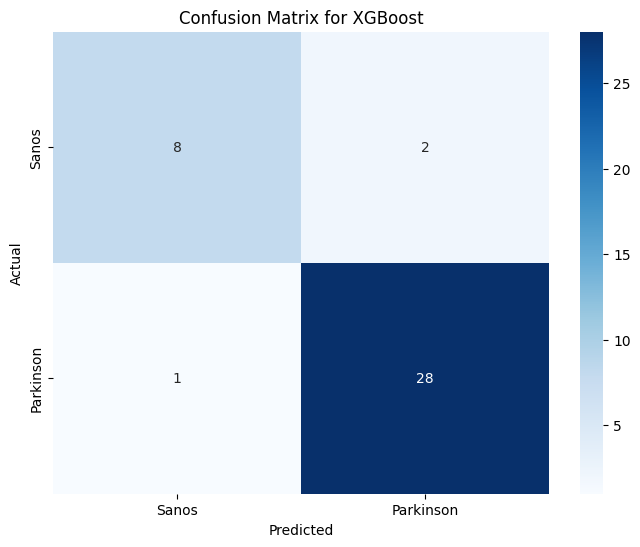

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.89      0.80      0.84        10
   Parkinson       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

------------------------------------------------------------

CatBoost:
  Test Set Results:
    Accuracy: 0.9487
    F1-Macro: 0.9328
    F1-Weighted: 0.9487
    F1-Sanos (Clase 0): 0.9000
    F1-Parkinson (Clase 1): 0.9655
  Cross Validation (5-fold):
    CV F1-Macro: 0.8798 (+/- 0.1216)
    CV Accuracy: 0.9101 (+/- 0.0953)


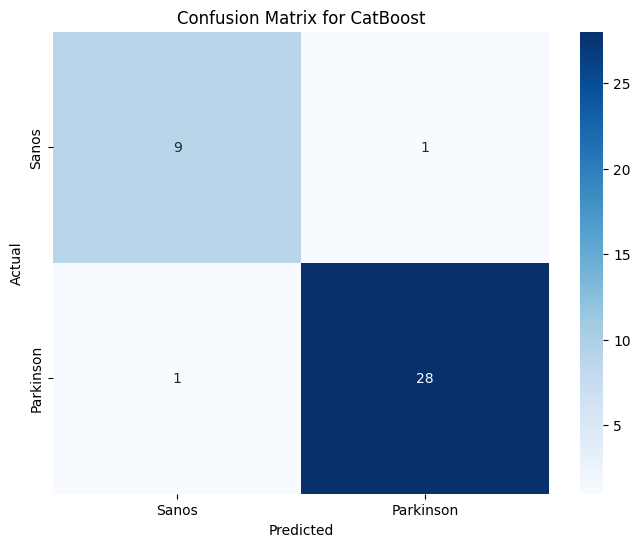

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.90      0.90      0.90        10
   Parkinson       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39

------------------------------------------------------------


In [42]:
train_and_eval_model(X1, y1)

In [ ]:
train_and_evaluate_models_improved(X1, y1)

#Probando con el dataset 3

EVALUACIÓN DE MODELOS CON VALIDACIÓN CRUZADA Y MANEJO DE DESBALANCE

Logistic Regression:
  Test Set Results:
    Accuracy: 0.6490
    F1-Macro: 0.6490
    F1-Weighted: 0.6490
    F1-Sanos (Clase 0): 0.6507
    F1-Parkinson (Clase 1): 0.6473
  Cross Validation (5-fold):
    CV F1-Macro: 0.6401 (+/- 0.0767)
    CV Accuracy: 0.6407 (+/- 0.0763)


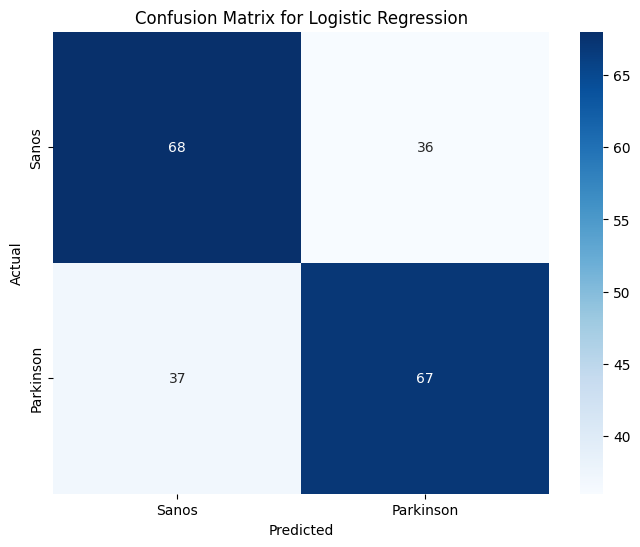

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.65      0.65      0.65       104
   Parkinson       0.65      0.64      0.65       104

    accuracy                           0.65       208
   macro avg       0.65      0.65      0.65       208
weighted avg       0.65      0.65      0.65       208

------------------------------------------------------------

Logistic Regression Ridge:
  Test Set Results:
    Accuracy: 0.6490
    F1-Macro: 0.6490
    F1-Weighted: 0.6490
    F1-Sanos (Clase 0): 0.6507
    F1-Parkinson (Clase 1): 0.6473
  Cross Validation (5-fold):
    CV F1-Macro: 0.6401 (+/- 0.0767)
    CV Accuracy: 0.6407 (+/- 0.0763)


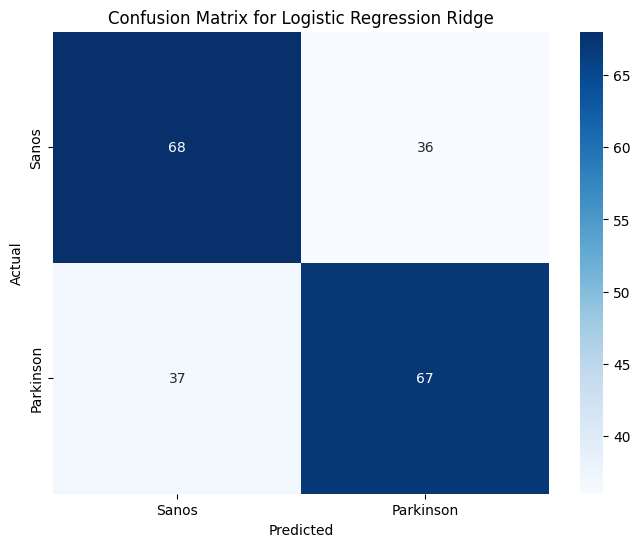

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.65      0.65      0.65       104
   Parkinson       0.65      0.64      0.65       104

    accuracy                           0.65       208
   macro avg       0.65      0.65      0.65       208
weighted avg       0.65      0.65      0.65       208

------------------------------------------------------------

Logistic Regression Lasso:
  Test Set Results:
    Accuracy: 0.6587
    F1-Macro: 0.6586
    F1-Weighted: 0.6586
    F1-Sanos (Clase 0): 0.6603
    F1-Parkinson (Clase 1): 0.6570
  Cross Validation (5-fold):
    CV F1-Macro: 0.6401 (+/- 0.0794)
    CV Accuracy: 0.6406 (+/- 0.0785)


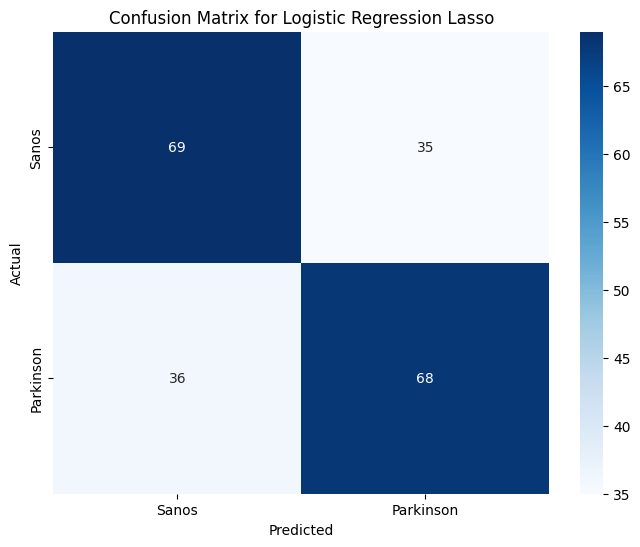

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.66      0.66      0.66       104
   Parkinson       0.66      0.65      0.66       104

    accuracy                           0.66       208
   macro avg       0.66      0.66      0.66       208
weighted avg       0.66      0.66      0.66       208

------------------------------------------------------------

Decision Tree:
  Test Set Results:
    Accuracy: 0.6298
    F1-Macro: 0.6279
    F1-Weighted: 0.6279
    F1-Sanos (Clase 0): 0.6010
    F1-Parkinson (Clase 1): 0.6547
  Cross Validation (5-fold):
    CV F1-Macro: 0.6373 (+/- 0.0907)
    CV Accuracy: 0.6381 (+/- 0.0906)


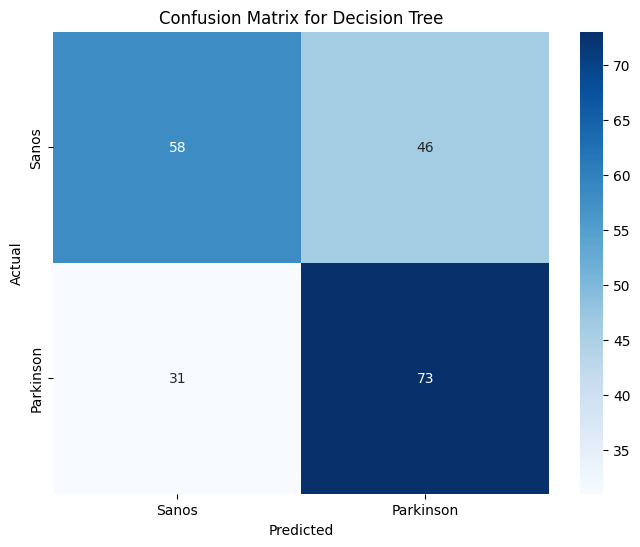

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.65      0.56      0.60       104
   Parkinson       0.61      0.70      0.65       104

    accuracy                           0.63       208
   macro avg       0.63      0.63      0.63       208
weighted avg       0.63      0.63      0.63       208

------------------------------------------------------------

Random Forest:
  Test Set Results:
    Accuracy: 0.6827
    F1-Macro: 0.6827
    F1-Weighted: 0.6827
    F1-Sanos (Clase 0): 0.6857
    F1-Parkinson (Clase 1): 0.6796
  Cross Validation (5-fold):
    CV F1-Macro: 0.6831 (+/- 0.0707)
    CV Accuracy: 0.6839 (+/- 0.0684)


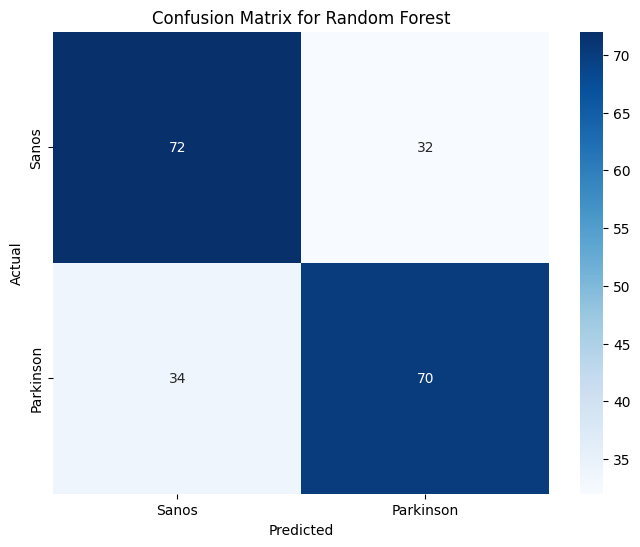

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.68      0.69      0.69       104
   Parkinson       0.69      0.67      0.68       104

    accuracy                           0.68       208
   macro avg       0.68      0.68      0.68       208
weighted avg       0.68      0.68      0.68       208

------------------------------------------------------------

SVM Polynomial:
  Test Set Results:
    Accuracy: 0.6346
    F1-Macro: 0.6061
    F1-Weighted: 0.6061
    F1-Sanos (Clase 0): 0.5000
    F1-Parkinson (Clase 1): 0.7121
  Cross Validation (5-fold):
    CV F1-Macro: 0.6023 (+/- 0.0666)
    CV Accuracy: 0.6274 (+/- 0.0592)


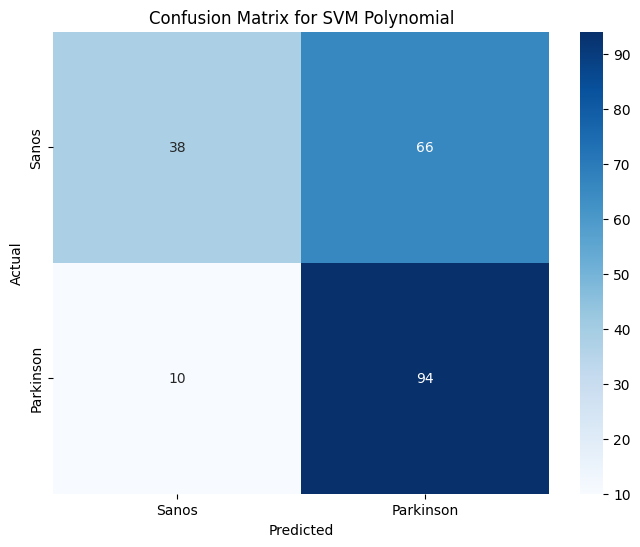

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.79      0.37      0.50       104
   Parkinson       0.59      0.90      0.71       104

    accuracy                           0.63       208
   macro avg       0.69      0.63      0.61       208
weighted avg       0.69      0.63      0.61       208

------------------------------------------------------------

SVM RBF:
  Test Set Results:
    Accuracy: 0.6971
    F1-Macro: 0.6968
    F1-Weighted: 0.6968
    F1-Sanos (Clase 0): 0.6866
    F1-Parkinson (Clase 1): 0.7070
  Cross Validation (5-fold):
    CV F1-Macro: 0.6629 (+/- 0.0638)
    CV Accuracy: 0.6646 (+/- 0.0609)


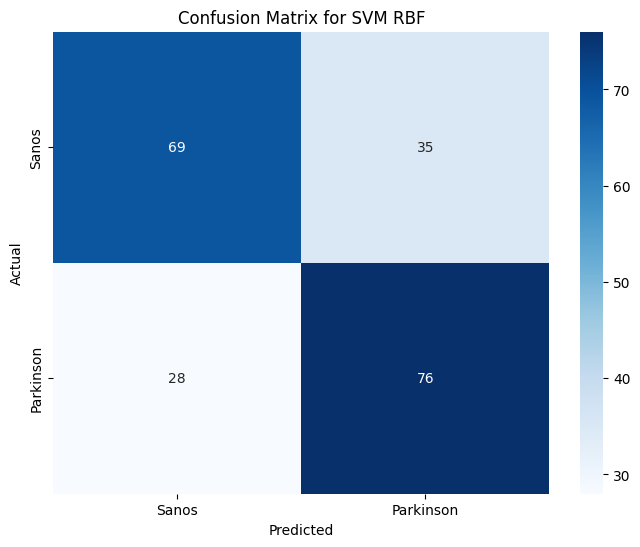

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.71      0.66      0.69       104
   Parkinson       0.68      0.73      0.71       104

    accuracy                           0.70       208
   macro avg       0.70      0.70      0.70       208
weighted avg       0.70      0.70      0.70       208

------------------------------------------------------------

SVM Linear:
  Test Set Results:
    Accuracy: 0.6635
    F1-Macro: 0.6634
    F1-Weighted: 0.6634
    F1-Sanos (Clase 0): 0.6667
    F1-Parkinson (Clase 1): 0.6602
  Cross Validation (5-fold):
    CV F1-Macro: 0.6449 (+/- 0.0549)
    CV Accuracy: 0.6455 (+/- 0.0547)


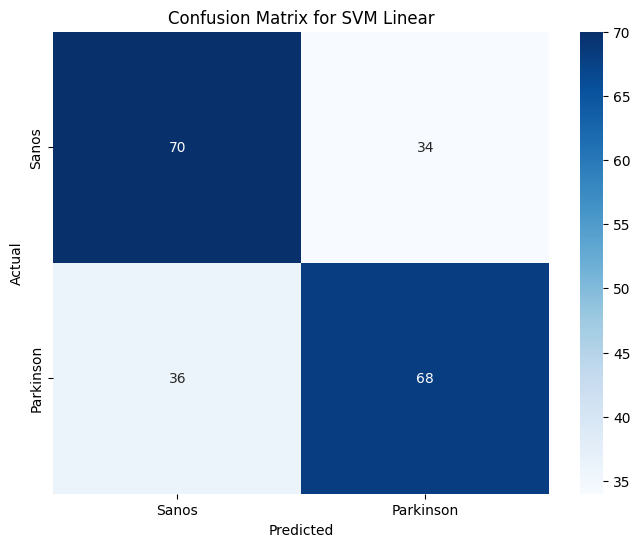

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.66      0.67      0.67       104
   Parkinson       0.67      0.65      0.66       104

    accuracy                           0.66       208
   macro avg       0.66      0.66      0.66       208
weighted avg       0.66      0.66      0.66       208

------------------------------------------------------------

KNN:
  Test Set Results:
    Accuracy: 0.6779
    F1-Macro: 0.6779
    F1-Weighted: 0.6779
    F1-Sanos (Clase 0): 0.6763
    F1-Parkinson (Clase 1): 0.6794
  Cross Validation (5-fold):
    CV F1-Macro: 0.6617 (+/- 0.0790)
    CV Accuracy: 0.6623 (+/- 0.0783)


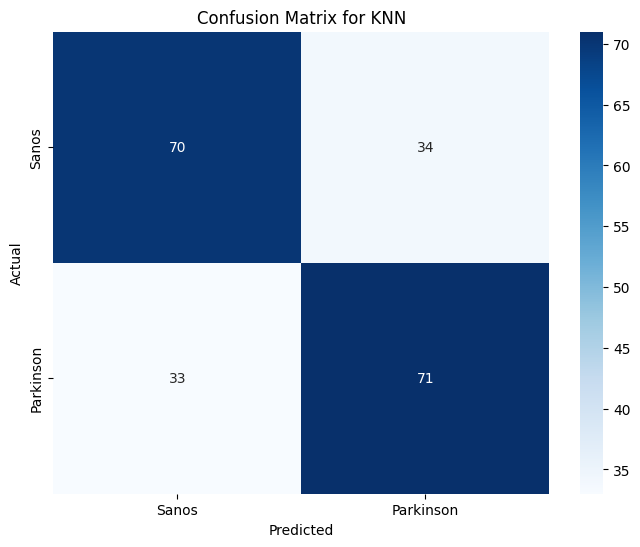

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.68      0.67      0.68       104
   Parkinson       0.68      0.68      0.68       104

    accuracy                           0.68       208
   macro avg       0.68      0.68      0.68       208
weighted avg       0.68      0.68      0.68       208

------------------------------------------------------------

KNN Uniform:
  Test Set Results:
    Accuracy: 0.6971
    F1-Macro: 0.6969
    F1-Weighted: 0.6969
    F1-Sanos (Clase 0): 0.6897
    F1-Parkinson (Clase 1): 0.7042
  Cross Validation (5-fold):
    CV F1-Macro: 0.6592 (+/- 0.0749)
    CV Accuracy: 0.6599 (+/- 0.0751)


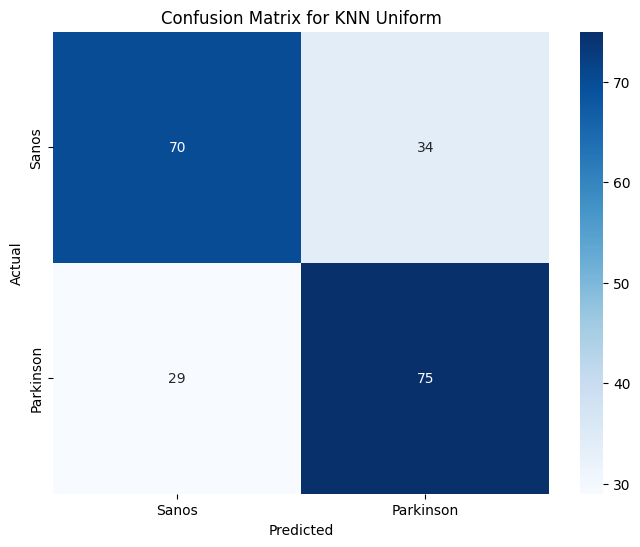

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.71      0.67      0.69       104
   Parkinson       0.69      0.72      0.70       104

    accuracy                           0.70       208
   macro avg       0.70      0.70      0.70       208
weighted avg       0.70      0.70      0.70       208

------------------------------------------------------------

Neural Network:
  Test Set Results:
    Accuracy: 0.6779
    F1-Macro: 0.6752
    F1-Weighted: 0.6752
    F1-Sanos (Clase 0): 0.7048
    F1-Parkinson (Clase 1): 0.6455
  Cross Validation (5-fold):
    CV F1-Macro: 0.6883 (+/- 0.0412)
    CV Accuracy: 0.6887 (+/- 0.0417)


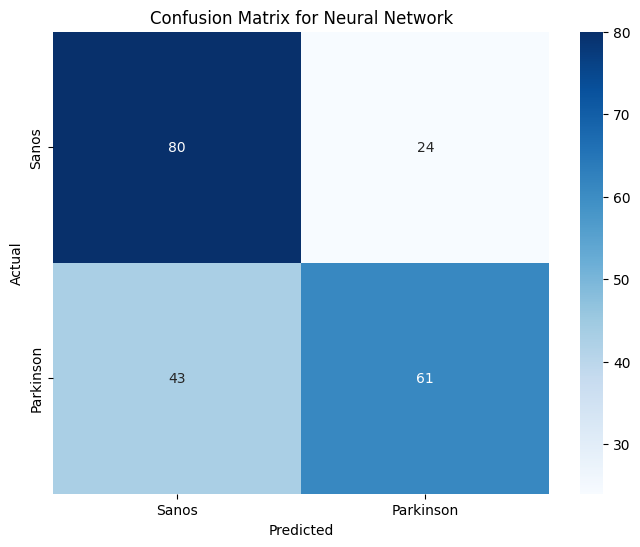

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.65      0.77      0.70       104
   Parkinson       0.72      0.59      0.65       104

    accuracy                           0.68       208
   macro avg       0.68      0.68      0.68       208
weighted avg       0.68      0.68      0.68       208

------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS R


Neural Network Small:
  Test Set Results:
    Accuracy: 0.6442
    F1-Macro: 0.6441
    F1-Weighted: 0.6441
    F1-Sanos (Clase 0): 0.6373
    F1-Parkinson (Clase 1): 0.6509
  Cross Validation (5-fold):
    CV F1-Macro: 0.6776 (+/- 0.0762)
    CV Accuracy: 0.6779 (+/- 0.0765)


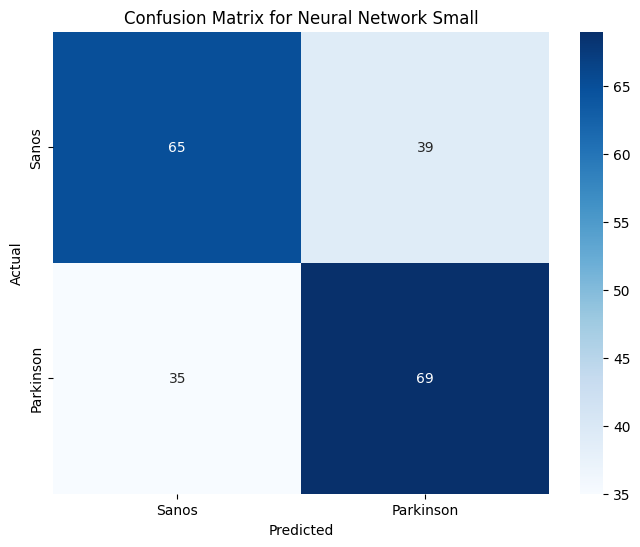

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.65      0.62      0.64       104
   Parkinson       0.64      0.66      0.65       104

    accuracy                           0.64       208
   macro avg       0.64      0.64      0.64       208
weighted avg       0.64      0.64      0.64       208

------------------------------------------------------------

XGBoost:
  Test Set Results:
    Accuracy: 0.7212
    F1-Macro: 0.7211
    F1-Weighted: 0.7211
    F1-Sanos (Clase 0): 0.7184
    F1-Parkinson (Clase 1): 0.7238
  Cross Validation (5-fold):
    CV F1-Macro: 0.6861 (+/- 0.1009)
    CV Accuracy: 0.6862 (+/- 0.1009)


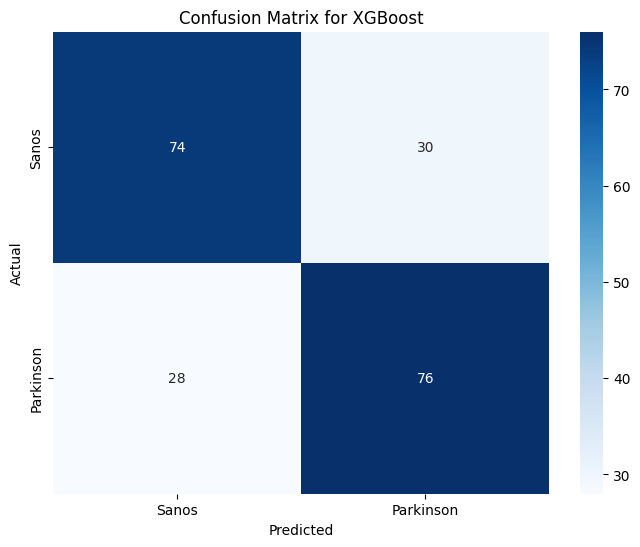

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.73      0.71      0.72       104
   Parkinson       0.72      0.73      0.72       104

    accuracy                           0.72       208
   macro avg       0.72      0.72      0.72       208
weighted avg       0.72      0.72      0.72       208

------------------------------------------------------------

CatBoost:
  Test Set Results:
    Accuracy: 0.6490
    F1-Macro: 0.6488
    F1-Weighted: 0.6488
    F1-Sanos (Clase 0): 0.6573
    F1-Parkinson (Clase 1): 0.6404
  Cross Validation (5-fold):
    CV F1-Macro: 0.6978 (+/- 0.0805)
    CV Accuracy: 0.6983 (+/- 0.0800)


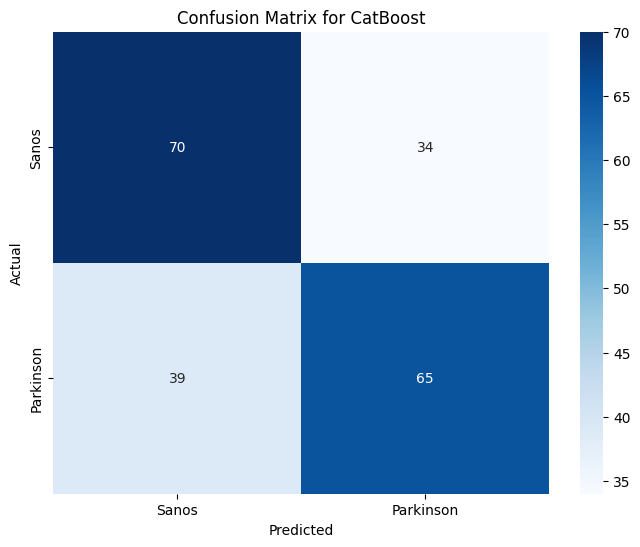

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.64      0.67      0.66       104
   Parkinson       0.66      0.62      0.64       104

    accuracy                           0.65       208
   macro avg       0.65      0.65      0.65       208
weighted avg       0.65      0.65      0.65       208

------------------------------------------------------------


In [48]:
train_and_eval_model(X3, y3)

EVALUACIÓN DE MODELOS CON VALIDACIÓN CRUZADA Y MANEJO DE DESBALANCE

Logistic Regression:
  Test Set Results:
    Accuracy: 0.6490
    F1-Macro: 0.6490
    F1-Weighted: 0.6490
    F1-Sanos (Clase 0): 0.6507
    F1-Parkinson (Clase 1): 0.6473
  Cross Validation (5-fold):
    CV F1-Macro: 0.6401 (+/- 0.0767)
    CV Accuracy: 0.6407 (+/- 0.0763)


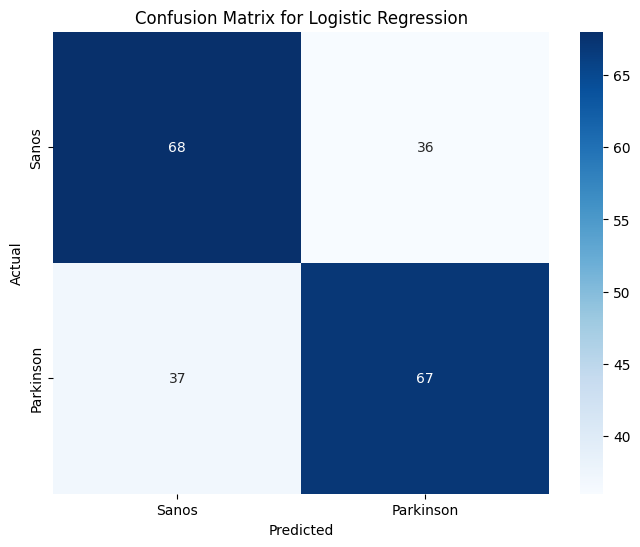

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.65      0.65      0.65       104
   Parkinson       0.65      0.64      0.65       104

    accuracy                           0.65       208
   macro avg       0.65      0.65      0.65       208
weighted avg       0.65      0.65      0.65       208

------------------------------------------------------------

Decision Tree:
  Test Set Results:
    Accuracy: 0.6298
    F1-Macro: 0.6279
    F1-Weighted: 0.6279
    F1-Sanos (Clase 0): 0.6010
    F1-Parkinson (Clase 1): 0.6547
  Cross Validation (5-fold):
    CV F1-Macro: 0.6373 (+/- 0.0907)
    CV Accuracy: 0.6381 (+/- 0.0906)


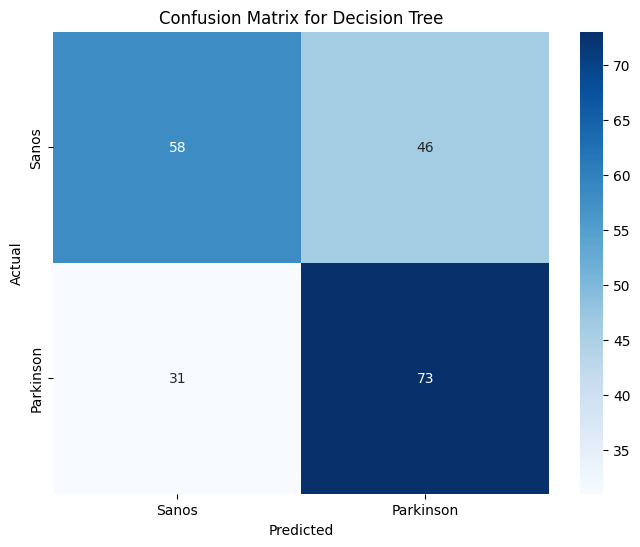

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.65      0.56      0.60       104
   Parkinson       0.61      0.70      0.65       104

    accuracy                           0.63       208
   macro avg       0.63      0.63      0.63       208
weighted avg       0.63      0.63      0.63       208

------------------------------------------------------------

Random Forest:
  Test Set Results:
    Accuracy: 0.6827
    F1-Macro: 0.6827
    F1-Weighted: 0.6827
    F1-Sanos (Clase 0): 0.6857
    F1-Parkinson (Clase 1): 0.6796
  Cross Validation (5-fold):
    CV F1-Macro: 0.6831 (+/- 0.0707)
    CV Accuracy: 0.6839 (+/- 0.0684)


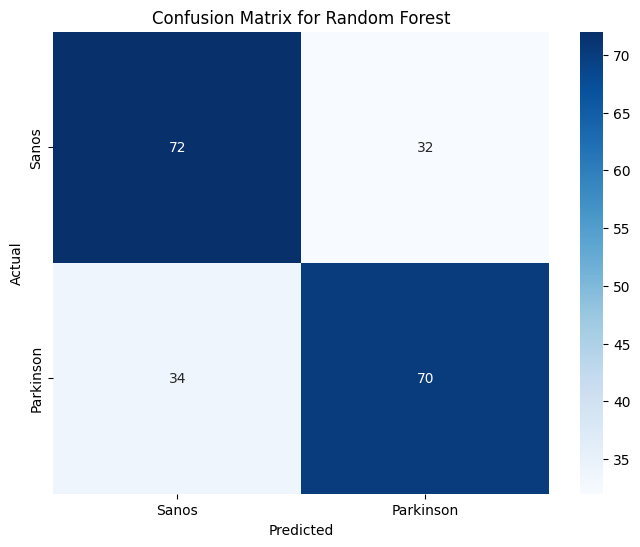

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.68      0.69      0.69       104
   Parkinson       0.69      0.67      0.68       104

    accuracy                           0.68       208
   macro avg       0.68      0.68      0.68       208
weighted avg       0.68      0.68      0.68       208

------------------------------------------------------------

Support Vector Classifier:
  Test Set Results:
    Accuracy: 0.6346
    F1-Macro: 0.6061
    F1-Weighted: 0.6061
    F1-Sanos (Clase 0): 0.5000
    F1-Parkinson (Clase 1): 0.7121
  Cross Validation (5-fold):
    CV F1-Macro: 0.6023 (+/- 0.0666)
    CV Accuracy: 0.6274 (+/- 0.0592)


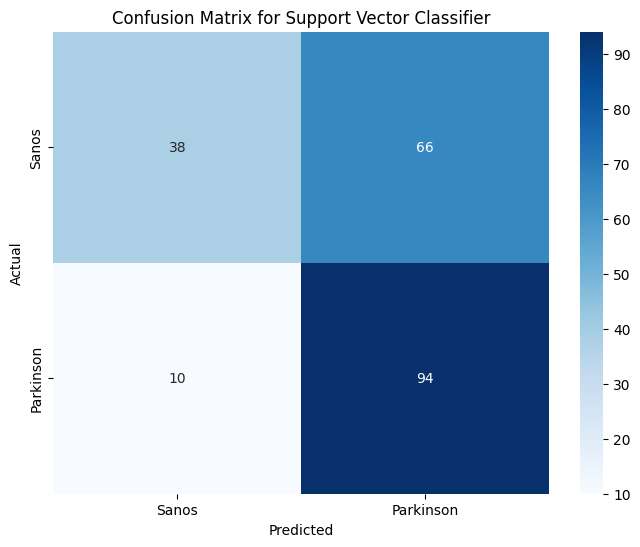

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.79      0.37      0.50       104
   Parkinson       0.59      0.90      0.71       104

    accuracy                           0.63       208
   macro avg       0.69      0.63      0.61       208
weighted avg       0.69      0.63      0.61       208

------------------------------------------------------------

XGBoost:
  Test Set Results:
    Accuracy: 0.7212
    F1-Macro: 0.7211
    F1-Weighted: 0.7211
    F1-Sanos (Clase 0): 0.7184
    F1-Parkinson (Clase 1): 0.7238
  Cross Validation (5-fold):
    CV F1-Macro: 0.6861 (+/- 0.1009)
    CV Accuracy: 0.6862 (+/- 0.1009)


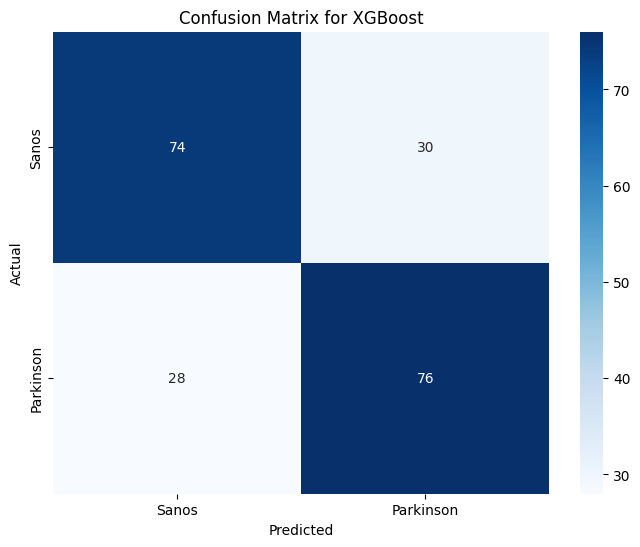

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.73      0.71      0.72       104
   Parkinson       0.72      0.73      0.72       104

    accuracy                           0.72       208
   macro avg       0.72      0.72      0.72       208
weighted avg       0.72      0.72      0.72       208

------------------------------------------------------------

CatBoost:
  Test Set Results:
    Accuracy: 0.6490
    F1-Macro: 0.6488
    F1-Weighted: 0.6488
    F1-Sanos (Clase 0): 0.6573
    F1-Parkinson (Clase 1): 0.6404
  Cross Validation (5-fold):
    CV F1-Macro: 0.6978 (+/- 0.0805)
    CV Accuracy: 0.6983 (+/- 0.0800)


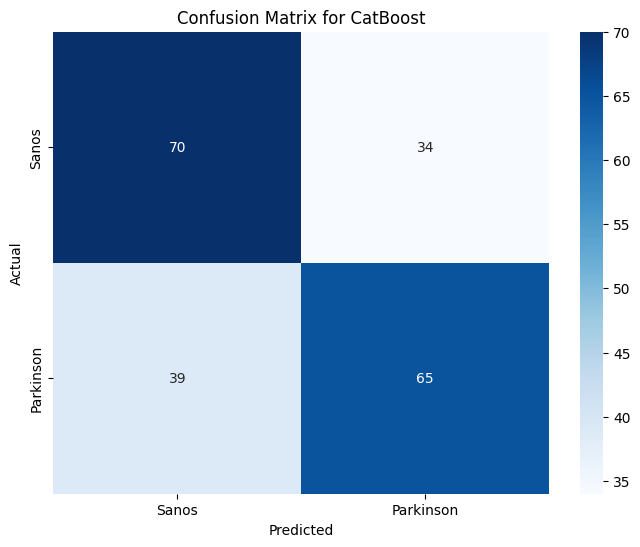

  Classification Report:
              precision    recall  f1-score   support

       Sanos       0.64      0.67      0.66       104
   Parkinson       0.66      0.62      0.64       104

    accuracy                           0.65       208
   macro avg       0.65      0.65      0.65       208
weighted avg       0.65      0.65      0.65       208

------------------------------------------------------------


In [45]:
train_and_evaluate_models_improved(X3, y3)

In [49]:
X4 = df3.drop(cols_to_drop_df3, axis=1)
y4 = df3[target_df3]

scaler = StandardScaler()
X4_scaled = scaler.fit_transform(X4)

In [ ]:
train_and_evaluate_models_improved(X4_scaled, y4)

In [ ]:
train_and_eval_model(X4_scaled, y4)

#Probando con feature selection

In [46]:
from sklearn.feature_selection import (
    SelectKBest, f_classif, chi2, mutual_info_classif,
    RFE, RFECV, SelectFromModel, VarianceThreshold
)